<div style='background-image: url("main.png") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 200px ; width: 100%'>
    <div style="float: right ; margin: 20px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.9) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , .8) ; line-height: 100%">Mécanique
            </div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Équations du second ordre | Pendule pesant & isochronisme des pulsations
             </div>
        </div>
    </div>
</div>

In [1]:
# commande permettant d'insérer les figures matplotlib dans les notebooks
%matplotlib widget

# import des librairies 
import numpy as np
from scipy.integrate import odeint
from scipy import fft
import matplotlib.pyplot as plt

# Mise en œuvre du problème physique : pendule pesant
## Problème physique à résoudre
On considère un solide de centre de gravité $G$, tournant autour de l'axe $Ox$, de masse $m$ et de moment d'inertie autour cet axe noté $J$. On considère que ce solide est placé dans un référentiel galiléen, et qu'il est soumis à son seul poids.

&nbsp;
En notant $\theta$ l'angle que fait l'axe $OG$ du solide avec la verticale $Oz$ à un instant $t$, et $\ell$ la distance $OG$, le théorème du moment cinétique s'écrit :
$$J\ddot{\theta}=-mg\ell\sin\theta$$

### Petits angles
Cette équation est non linéaire et sa résolution peut se faire dans le cadre des petits angles $\theta$ où $\sin\theta\simeq\theta$. On obtient alors un oscillateur harmonique d'équation : 
$$\ddot{\theta}+\dfrac{mg\ell}{J}\theta=0$$

&nbsp;
La pulsation propre est donc $\omega_0=\sqrt{\frac{mg\ell}{J}}$ et sa période est donc :
$$T=2\pi\sqrt{\dfrac{J}{mg\ell}}$$

&nbsp;
La période est donc indépendante des conditions initiales, ce que l'on cherche à vérifier avec le script suivant.


#### Méthode numérique
La méthode `odeint` de la librairie `scipy` permet de résoudre les équations différentielles écrites sous la forme $\frac{\text{d}x}{\text{d}t}=f(x,t)$ de façon plus précise que la méthode d'Euler à discrétisation identique.

&nbsp;
La résolution d'une équation différentielle d'ordre 2 demande donc une mise en forme sous la forme vectorielle suivante : 
$$\left\lbrace\begin{array}{l}
x=\dot{\theta} \\
\dot{x}=-\dfrac{mg\ell}{J}\theta
\end{array}\right.$$

&nbsp;
On déclare donc une nouvelle variable $\Theta=[\theta,\dot{\theta}]$ que l'on note `xv` à laquelle on applique la fonction vectorielle $$\Theta\mapsto\left(\begin{array}{l}\dot{\theta}\\ -\dfrac{mg\ell}{J}\theta\end{array}\right)$$
que l'on note `deriv2`.

In [2]:
# Données propres au système
m = 1.      # masse du système
l = 1.  # longueur OG
g = 9.81     # accélération de pesanteur
J = 4.0    # moment d'inertie autour de Ox
omega0 = np.sqrt(m*g*l/J)

# conditions initiales
theta0 = [10,20,30,40,50,60,70,80,90] # angle initial
dot_theta0 = 0.     # vitesse angulaire initiale

# Paramètres d'intégration temporelle
Tmax = 100*2*np.pi*np.sqrt(J/(m*g*l)) # durée de l'intégration
N = 100000 # Discrétisation / nb de points affichés
t = np.linspace(0.0,Tmax,N) # vecteur temps


# Fonction vectorielle reprenant l'équation différentielle à résoudre
def deriv2(xv,t):
    return [xv[1], -m*g*l*xv[0]/J]

theta=[]
dot_theta=[]
for angle0 in theta0:
    xv0 = [angle0,dot_theta0] # vecteur contenant les conditions initiales
    xv = odeint(deriv2,xv0,t) # résolution de l'équation différentielle à partir des conditions initiales
    theta.append(xv[:,0]) # extraction des valeurs d'angle de la solution obtenue
    dot_theta.append(xv[:,1]) # extraction des valeurs de vitesse angulaire de la solution obtenue
    

Une fois l'équation résolue, on peut tracer les fonctions suivantes : 
* loi horaire ;
* et comme le mouvement est périodique : spectre en fréquences.

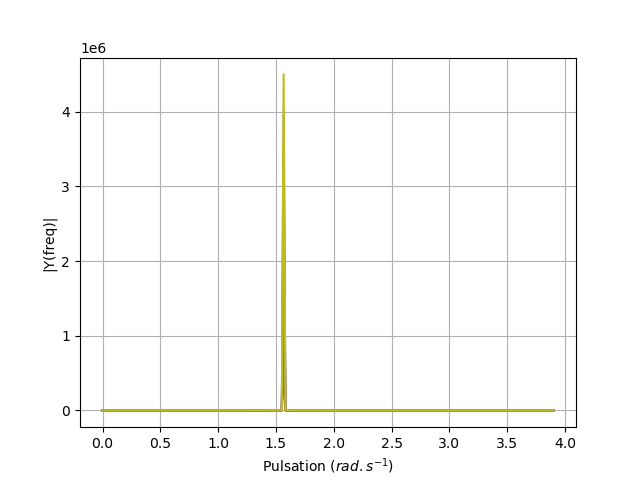

La valeur attendue de la pulsation est :  1.566 rad/s
La valeur calculée par odeint est : 1.566  rad/s pour l'angle initial  10
La valeur calculée par odeint est : 1.566  rad/s pour l'angle initial  20
La valeur calculée par odeint est : 1.566  rad/s pour l'angle initial  30
La valeur calculée par odeint est : 1.566  rad/s pour l'angle initial  40
La valeur calculée par odeint est : 1.566  rad/s pour l'angle initial  50
La valeur calculée par odeint est : 1.566  rad/s pour l'angle initial  60
La valeur calculée par odeint est : 1.566  rad/s pour l'angle initial  70
La valeur calculée par odeint est : 1.566  rad/s pour l'angle initial  80
La valeur calculée par odeint est : 1.566  rad/s pour l'angle initial  90


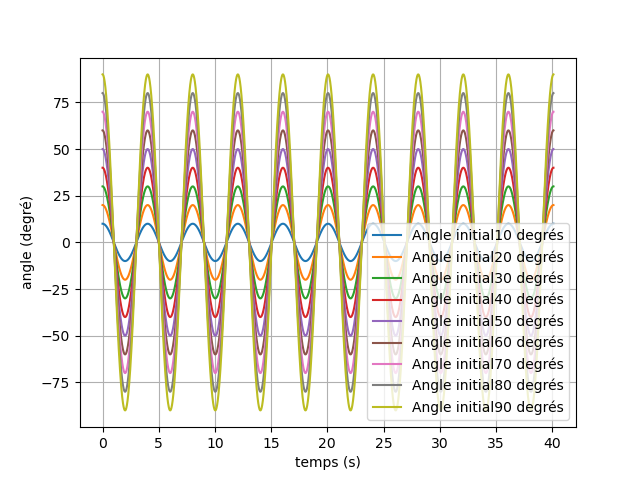

In [3]:
# Tracé du signal en fonction du temps
plt.figure()
for i in range(len(theta0)):
    legend="Angle initial"+str(theta0[i])+" degrés"
    plt.plot(t[:int(N/10)],theta[i][:int(N/10)], label=legend)
plt.legend()
plt.grid(True)
plt.xlabel('temps (s)')
plt.ylabel('angle (degré)')

# Tracé de la FFT
plt.figure()
power=[]
freq=[]
for i in range(len(theta0)):
    nb = 400 # découpe du domaine fréquentiel affiché
    Y1 = fft.fft(theta[i],N) # fft computing and normalization
    Y = Y1[:int(N/nb)]
    frq1 = np.arange(N)/(Tmax)
    frq = frq1[:int(N/nb)] # one side frequency range
    power.append(Y)
    freq.append(frq)
    plt.plot(freq[i]*2*np.pi,abs(power[i])) # plotting the spectrum
plt.grid(True)
#    plt.legend((r'Sans frottement', r'Avec frottement'))
plt.xlabel('Pulsation ' r'$(rad.s^{-1})$')
plt.ylabel('|Y(freq)|')
plt.show()

print("La valeur attendue de la pulsation est : ", format(omega0,"#.3f"), "rad/s")
for i in range(len(theta0)) :
    max_value = max(power[i])
    max_index = np.where(power[i] == max_value)
    print("La valeur calculée par odeint est :",format(2*np.pi*freq[i][max_index][0],"#.3f")," rad/s pour l'angle initial ",theta0[i])

On retrouve bien les résultats attendus : 
* pulsation égale à la pulsation propre ;
* isochronisme des pulsations.

&nbsp;
Néanmoins les angles supérieurs à 20° sortent de la catégorie "petits angles" et il convient de reprendre la simulation sans cette hypothèse. La méthode `odeint`permet de le faire tout aussi simplement :

### Grands angles
On garde l'équation différentielle complète et on cherche donc à résoudre : 
$$\ddot{\theta}=-\dfrac{mg\ell}{J}\sin\theta$$


#### Méthode numérique

La résolution d'une équation différentielle d'ordre 2 demande donc une mise en forme sous la forme vectorielle suivante : 
$$\left\lbrace\begin{array}{l}
x=\dot{\theta} \\
\dot{x}=-\dfrac{mg\ell}{J}\sin\theta
\end{array}\right.$$

&nbsp;
On déclare donc une nouvelle variable $\Theta=[\theta,\dot{\theta}]$ que l'on note `xv` à laquelle on applique la fonction vectorielle $$\Theta\mapsto\left(\begin{array}{l}\dot{\theta}\\ -\dfrac{mg\ell}{J}\sin\theta\end{array}\right)$$
que l'on note `deriv2_sin`.

In [4]:
# Fonction vectorielle reprenant l'équation différentielle à résoudre
def deriv2_sin(xv,t):
    return [xv[1], -m*g*l*np.sin(xv[0])/J]

theta=[]
dot_theta=[]
for angle0 in theta0:
    xv0 = [np.pi*angle0/180,dot_theta0] # vecteur contenant les conditions initiales
    xv = odeint(deriv2_sin,xv0,t) # résolution de l'équation différentielle à partir des conditions initiales
    theta.append(xv[:,0]) # extraction des valeurs d'angle de la solution obtenue
    dot_theta.append(xv[:,1]) # extraction des valeurs de vitesse angulaire de la solution obtenue
    

Une fois l'équation résolue, on peut tracer les fonctions suivantes : 
* loi horaire ;
* et comme le mouvement est périodique : spectre en fréquences.

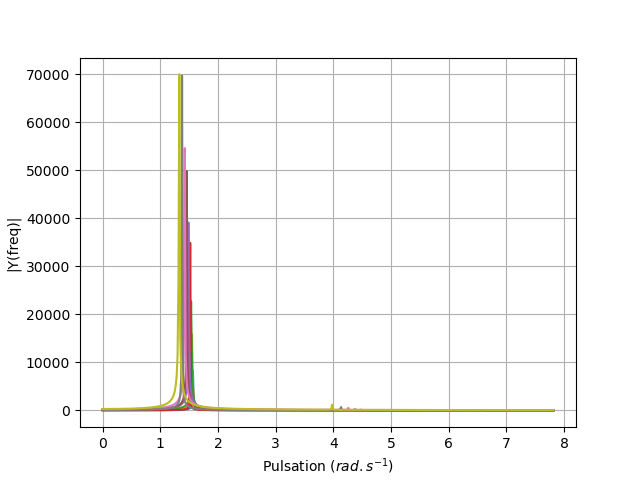

La valeur attendue de la pulsation est :  1.566 rad/s
La valeur calculée par odeint est : 1.566  rad/s pour l'angle initial  10
La valeur calculée par odeint est : 1.550  rad/s pour l'angle initial  20
La valeur calculée par odeint est : 1.535  rad/s pour l'angle initial  30
La valeur calculée par odeint est : 1.519  rad/s pour l'angle initial  40
La valeur calculée par odeint est : 1.488  rad/s pour l'angle initial  50
La valeur calculée par odeint est : 1.456  rad/s pour l'angle initial  60
La valeur calculée par odeint est : 1.425  rad/s pour l'angle initial  70
La valeur calculée par odeint est : 1.378  rad/s pour l'angle initial  80
La valeur calculée par odeint est : 1.331  rad/s pour l'angle initial  90


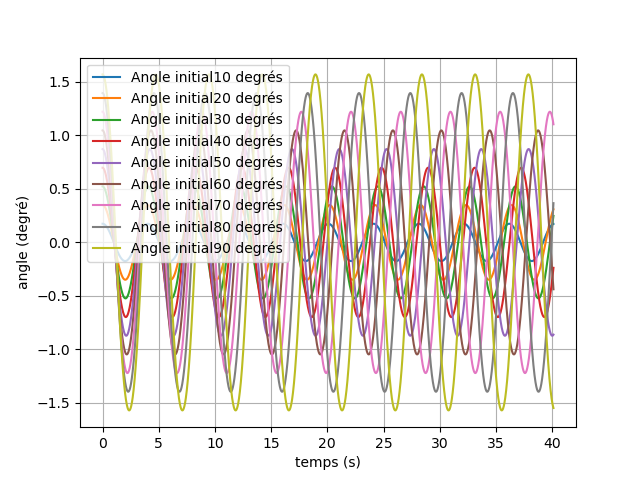

In [5]:
nb = 200 # découpe du domaine fréquentiel affiché

# Tracé du signal en fonction du temps
plt.figure()
for i in range(len(theta0)):
    legend="Angle initial"+str(theta0[i])+" degrés"
    plt.plot(t[:int(N/10)],theta[i][:int(N/10)], label=legend)
plt.legend()
plt.grid(True)
plt.xlabel('temps (s)')
plt.ylabel('angle (degré)')

# Tracé de la FFT
plt.figure()
power=[]
freq=[]
for i in range(len(theta0)):
    Y1 = fft.fft(theta[i],N) # fft computing and normalization
    Y = Y1[:int(N/nb)]
    frq1 = np.arange(N)/(Tmax)
    frq = frq1[:int(N/nb)] # one side frequency range
    power.append(Y)
    freq.append(frq)
    plt.plot(freq[i]*2*np.pi,abs(power[i])) # plotting the spectrum
plt.grid(True)
#    plt.legend((r'Sans frottement', r'Avec frottement'))
plt.xlabel('Pulsation ' r'$(rad.s^{-1})$')
plt.ylabel('|Y(freq)|')
plt.show()

print("La valeur attendue de la pulsation est : ", format(omega0,"#.3f"), "rad/s")
for i in range(len(theta0)) :
    max_value = max(power[i])
    max_index = np.where(power[i] == max_value)
    print("La valeur calculée par odeint est :",format(2*np.pi*freq[i][max_index][0],"#.3f")," rad/s pour l'angle initial ",theta0[i])

On retrouve une rapide croissante exponentielle qui se traduit par une quasi-droite dans le portrait de phase.

Les effets des non-linéarités se traduisent par :
* un décalage fréquentiel du mode principal ;
* une apparition de nouvelles fréquences.